# PAID: (Prompt-guided) Attention Interpolation of Text-to-Image Diffusion

Author: Qiyuan He $^1$ Jinghao Wang $^2$ Ziwei Liu $^2$ Angela Yao $^1$

$^1$ National University of Singapore 

$^2$ S-Lab, Nanyang Technological University

In [ ]:
import torch
from PIL import Image

from pipeline_interpolated_sd import InterpolationStableDiffusionPipeline
from prior import BetaPriorPipeline
from utils import image_grids

## AID for Stable Diffusion

In [20]:
generator = torch.cuda.manual_seed(1002)
dtype = torch.float16

pipe = InterpolationStableDiffusionPipeline.from_pretrained(
    "SG161222/Realistic_Vision_V4.0_noVAE", torch_dtype=torch.float16, safety_checker=None
)
pipe.to("cuda", dtype=dtype)
beta_pipe = BetaPriorPipeline(pipe)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/home/qiyuan/.conda/envs/AID/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [6]:
size = pipe.unet.config.sample_size
latent_start = torch.randn((1, 4, size, size,), device="cuda", dtype=dtype, generator=generator)
latent_end = torch.randn((1, 4, size, size,), device="cuda", dtype=dtype, generator=generator)

torch.Size([1, 4, 64, 64])


  0%|          | 0/50 [00:00<?, ?it/s]

Alpha: 3 | Beta: 3 | Current Coefs: [0.0, 0.5, 1.0] | Current Distances: [tensor(0.0249), tensor(0.4971)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 4 / 7--------
Alpha: 37.61994221572739 | Beta: 23.956788911691937 | Current Coefs: [0.0, 0.5, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.0249), tensor(0.4064), tensor(0.2055)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 5 / 7--------
Alpha: 120.69958365912704 | Beta: 73.12327635556812 | Current Coefs: [0.0, 0.5, 0.5893648075495652, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.0249), tensor(0.0875), tensor(0.3505), tensor(0.2055)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 6 / 7--------
Alpha: 130.6401357741976 | Beta: 81.27465670792559 | Current Coefs: [0.0, 0.5, 0.5893648075495652, 0.6170439100889875, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.0249), tensor(0.0875), tensor(0.2981), tensor(0.0944), tensor(0.2055)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 7 / 7--------
Alpha: 170.2310989394982 | Beta: 105.67340536093334 | Current Coefs: [0.0, 0.5, 0.5893648075495652, 0.6043560895377219, 0.6170439100889875, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.0249), tensor(0.0875), tensor(0.0971), tensor(0.2481), tensor(0.0944), tensor(0.2055)]
Optimal smooth path: [0, 3, 4, 5, 6]


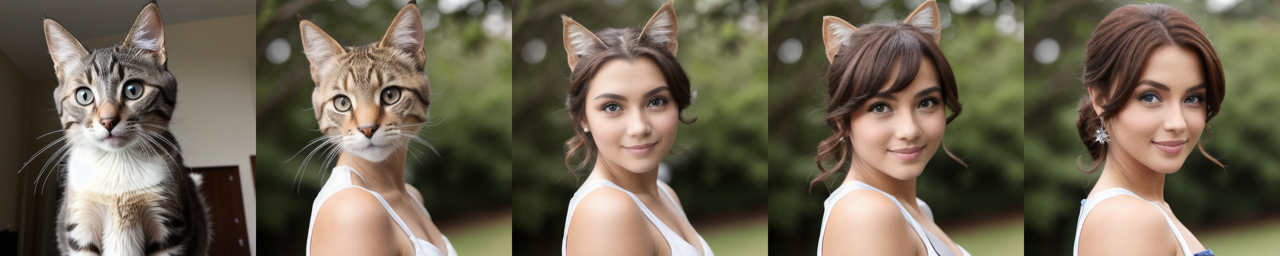

In [14]:
prompt_a = "A photo of a cat"
prompt_b = "A photo of a beautiful lady"
negative_prompt = "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]" # "deformed, ugly, wrong proportion, low res, bad anatomy, worst quality, low quality"
interpolation_size = 5
num_inference_steps = 50

images = beta_pipe.generate_interpolation(
    prompt_a,
    prompt_b,
    negative_prompt,
    latent_end,
    latent_end,
    num_inference_steps,
    exploration_size=int(interpolation_size * 1.5),
    interpolation_size=interpolation_size,
    warmup_ratio=0.5
)

show_image = image_grids(images, 1, interpolation_size).resize((interpolation_size * 256, 256))
show_image

  0%|          | 0/50 [00:00<?, ?it/s]

Alpha: 3 | Beta: 3 | Current Coefs: [0.0, 0.5, 1.0] | Current Distances: [tensor(0.0880), tensor(0.4092)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 4 / 10--------
Alpha: 22.32328074495089 | Beta: 16.231627062693295 | Current Coefs: [0.0, 0.5, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.0880), tensor(0.3396), tensor(0.1220)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 5 / 10--------
Alpha: 67.3510971860899 | Beta: 44.082838061426294 | Current Coefs: [0.0, 0.5, 0.5741676034152345, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.0880), tensor(0.0476), tensor(0.3443), tensor(0.1220)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 6 / 10--------
Alpha: 89.24864708308549 | Beta: 57.16205960250506 | Current Coefs: [0.0, 0.5, 0.5741676034152345, 0.6070946116391718, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.0880), tensor(0.0476), tensor(0.1402), tensor(0.2479), tensor(0.1220)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 7 / 10--------
Alpha: 83.20561045318377 | Beta: 51.97410084742221 | Current Coefs: [0.0, 0.5, 0.5741676034152345, 0.6070946116391718, 0.622776942854016, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.0880), tensor(0.0476), tensor(0.1402), tensor(0.0338), tensor(0.2429), tensor(0.1220)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 8 / 10--------
Alpha: 108.28636021575767 | Beta: 68.29687275444779 | Current Coefs: [0.0, 0.5, 0.5741676034152345, 0.6070946116391718, 0.622776942854016, 0.6313476784219751, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.0880), tensor(0.0476), tensor(0.1402), tensor(0.0338), tensor(0.2183), tensor(0.0255), tensor(0.1220)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 9 / 10--------
Alpha: 153.5997691162291 | Beta: 95.16610587118657 | Current Coefs: [0.0, 0.5, 0.5741676034152345, 0.6070946116391718, 0.622776942854016, 0.6269766884643511, 0.6313476784219751, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.0880), tensor(0.0476), tensor(0.1402), tensor(0.0338), tensor(0.1173), tensor(0.1853), tensor(0.0255), tensor(0.1220)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 10 / 10--------
Alpha: 189.66714126322776 | Beta: 117.89804997223203 | Current Coefs: [0.0, 0.5, 0.5741676034152345, 0.6070946116391718, 0.622776942854016, 0.6269766884643511, 0.6291350323743485, 0.6313476784219751, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.0880), tensor(0.0476), tensor(0.1402), tensor(0.0338), tensor(0.1173), tensor(0.1828), tensor(0.0141), tensor(0.0255), tensor(0.1220)]
Optimal smooth path: [0, 4, 5, 6, 9]


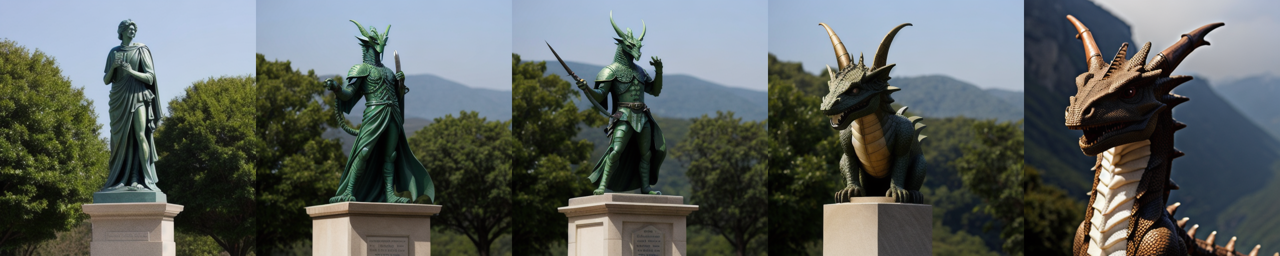

In [16]:
prompt_a = "A statue"
prompt_b = "A dragon"
negative_prompt = "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]" # "deformed, ugly, wrong proportion, low res, bad anatomy, worst quality, low quality"
interpolation_size = 5
num_inference_steps = 50

images = beta_pipe.generate_interpolation(
    prompt_a,
    prompt_b,
    negative_prompt,
    latent_end,
    latent_end,
    num_inference_steps,
    exploration_size=int(interpolation_size * 2),
    interpolation_size=interpolation_size,
    warmup_ratio=0.5
)

show_image = image_grids(images, 1, interpolation_size).resize((interpolation_size * 256, 256))
show_image

## AID + IP-Adapter

### Global Image Prompt

In [22]:
pipe.load_aid_ip_adapter("h94/IP-Adapter", subfolder="models", weight_name="ip-adapter_sd15.bin")

  0%|          | 0/50 [00:00<?, ?it/s]

Alpha: 3 | Beta: 3 | Current Coefs: [0.0, 0.5, 1.0] | Current Distances: [tensor(0.0632), tensor(0.2803)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 4 / 8--------
Alpha: 9.11770154185489 | Beta: 5.585485038457989 | Current Coefs: [0.0, 0.5, 0.6405638352103529, 1.0] | Current Distances: [tensor(0.0632), tensor(0.1397), tensor(0.1684)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 5 / 8--------
Alpha: 11.904805061633546 | Beta: 7.030814818544883 | Current Coefs: [0.0, 0.5, 0.6405638352103529, 0.7176285716179713, 1.0] | Current Distances: [tensor(0.0632), tensor(0.1397), tensor(0.1366), tensor(0.0765)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 6 / 8--------
Alpha: 10.657800825182786 | Beta: 6.396624938092093 | Current Coefs: [0.0, 0.5, 0.5816365326403743, 0.6405638352103529, 0.7176285716179713, 1.0] | Current Distances: [tensor(0.0632), tensor(0.0885), tensor(0.0471), tensor(0.1366), tensor(0.0765)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 7 / 8--------
Alpha: 9.234458804686005 | Beta: 5.61637252329726 | Current Coefs: [0.0, 0.5, 0.5816365326403743, 0.6405638352103529, 0.6772004875733246, 0.7176285716179713, 1.0] | Current Distances: [tensor(0.0632), tensor(0.0885), tensor(0.0471), tensor(0.0475), tensor(0.0661), tensor(0.0765)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 8 / 8--------
Alpha: 8.590470972940755 | Beta: 5.4445330967501935 | Current Coefs: [0.0, 0.5, 0.5450099061089657, 0.5816365326403743, 0.6405638352103529, 0.6772004875733246, 0.7176285716179713, 1.0] | Current Distances: [tensor(0.0632), tensor(0.0723), tensor(0.0395), tensor(0.0471), tensor(0.0475), tensor(0.0661), tensor(0.0765)]
Optimal smooth path: [0, 1, 3, 5, 7]


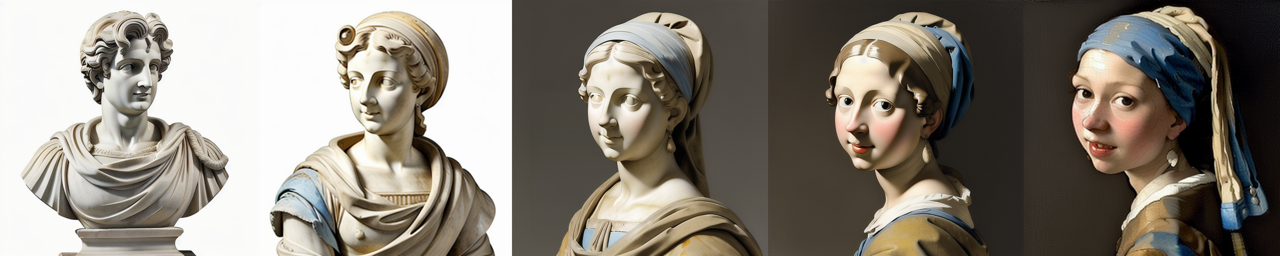

In [24]:
prompt_a = "A photo of a statue"
prompt_b = "Het meisje met de parel, by Vermeer"
negative_prompt = "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]"

image_a = Image.open("asset/statue.jpg")
image_b = Image.open("asset/vermeer.jpg")
images = beta_pipe.generate_interpolation(
    prompt_a,
    prompt_b,
    negative_prompt,
    latent_start,
    latent_start,
    image_start=image_a,
    image_end=image_b,
    num_inference_steps=50,
    exploration_size=8,
    interpolation_size=5,
    warmup_ratio=0.5
)
show_image = image_grids(images, 1, 5).resize((5 * 256, 256))
show_image

### Composition Image Prompt

In [25]:
pipe.load_aid_ip_adapter("ostris/ip-composition-adapter", subfolder="", weight_name="ip_plus_composition_sd15.safetensors")

  0%|          | 0/50 [00:00<?, ?it/s]

Alpha: 1 | Beta: 1 | Current Coefs: [0.0, 0.5, 1.0] | Current Distances: [tensor(0.1070), tensor(0.2138)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 4 / 8--------
Alpha: 5.195350539543675 | Beta: 3.93357523111799 | Current Coefs: [0.0, 0.5, 0.75, 1.0] | Current Distances: [tensor(0.1070), tensor(0.1746), tensor(0.0421)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 5 / 8--------
Alpha: 4.928990961412657 | Beta: 3.6630238387217386 | Current Coefs: [0.0, 0.5, 0.6166590008835668, 0.75, 1.0] | Current Distances: [tensor(0.1070), tensor(0.0746), tensor(0.0959), tensor(0.0421)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 6 / 8--------
Alpha: 5.040782204347315 | Beta: 3.886734911982692 | Current Coefs: [0.0, 0.4077173823061112, 0.5, 0.6166590008835668, 0.75, 1.0] | Current Distances: [tensor(0.0503), tensor(0.0769), tensor(0.0746), tensor(0.0959), tensor(0.0421)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 7 / 8--------
Alpha: 4.667744018092328 | Beta: 3.6127845507392373 | Current Coefs: [0.0, 0.4077173823061112, 0.5, 0.6166590008835668, 0.6764264632979878, 0.75, 1.0] | Current Distances: [tensor(0.0503), tensor(0.0769), tensor(0.0746), tensor(0.0339), tensor(0.0533), tensor(0.0421)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 8 / 8--------
Alpha: 5.0961926467889205 | Beta: 3.8285083768018384 | Current Coefs: [0.0, 0.4077173823061112, 0.4573150119763044, 0.5, 0.6166590008835668, 0.6764264632979878, 0.75, 1.0] | Current Distances: [tensor(0.0503), tensor(0.0175), tensor(0.0530), tensor(0.0746), tensor(0.0339), tensor(0.0533), tensor(0.0421)]
Optimal smooth path: [0, 3, 4, 6, 7]


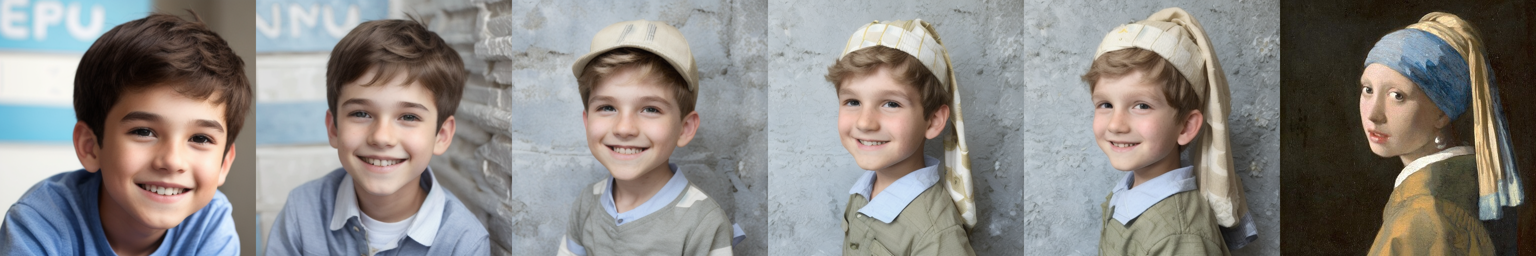

In [30]:
text_prompt = "A boy is smiling"
image_prompt = Image.open("asset/vermeer.jpg")
negative_prompt = "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]"
images = beta_pipe.generate_interpolation(
    text_prompt,
    text_prompt, # same text prompt for controlling the impact of image prompt
    negative_prompt,
    latent_start,
    latent_start,
    num_inference_steps=50,
    exploration_size=8,
    interpolation_size=5,
    image_start=None, # no image prompt for the start point
    image_end=image_prompt,
    output_type="pil",
    warmup_ratio=0.5,
    init_alpha=1,
    init_beta=1
)
images.append(image_prompt.resize((512, 512))) # the generated image should follow the depth map provided by image prompt
show_image = image_grids(images, 1, 6).resize((6 * 256, 256))
show_image


## Other base model

In [17]:
pipe = InterpolationStableDiffusionPipeline.from_pretrained(
    "Yntec/YiffyMix", torch_dtype=torch.float16, safety_checker=None
)
pipe.to("cuda", dtype=dtype)
beta_pipe = BetaPriorPipeline(pipe)

model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/133 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/379 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/home/qiyuan/.conda/envs/AID/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
/home/qiyuan/.conda/envs/AID/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

Alpha: 3 | Beta: 3 | Current Coefs: [0.0, 0.5, 1.0] | Current Distances: [tensor(0.1761), tensor(0.0377)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 4 / 10--------
Alpha: 11.747610667421474 | Beta: 17.389201184169945 | Current Coefs: [0.0, 0.3594361647896471, 0.5, 1.0] | Current Distances: [tensor(0.0848), tensor(0.1401), tensor(0.0377)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 5 / 10--------
Alpha: 13.77575886432223 | Beta: 21.054607563547474 | Current Coefs: [0.0, 0.3594361647896471, 0.4217977456143634, 0.5, 1.0] | Current Distances: [tensor(0.0848), tensor(0.0943), tensor(0.0501), tensor(0.0377)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 6 / 10--------
Alpha: 14.994577033171904 | Beta: 23.0841540339204 | Current Coefs: [0.0, 0.3594361647896471, 0.39053098075170883, 0.4217977456143634, 0.5, 1.0] | Current Distances: [tensor(0.0848), tensor(0.0553), tensor(0.0479), tensor(0.0501), tensor(0.0377)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 7 / 10--------
Alpha: 12.796180151212244 | Beta: 21.29356275144403 | Current Coefs: [0.0, 0.31812615465785987, 0.3594361647896471, 0.39053098075170883, 0.4217977456143634, 0.5, 1.0] | Current Distances: [tensor(0.0793), tensor(0.0658), tensor(0.0553), tensor(0.0479), tensor(0.0501), tensor(0.0377)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 8 / 10--------
Alpha: 11.695432680673306 | Beta: 19.596982983388116 | Current Coefs: [0.0, 0.2812809144858924, 0.31812615465785987, 0.3594361647896471, 0.39053098075170883, 0.4217977456143634, 0.5, 1.0] | Current Distances: [tensor(0.0529), tensor(0.0299), tensor(0.0658), tensor(0.0553), tensor(0.0479), tensor(0.0501), tensor(0.0377)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 9 / 10--------
Alpha: 15.035266745698399 | Beta: 25.968254164084506 | Current Coefs: [0.0, 0.2812809144858924, 0.31812615465785987, 0.3395080356989535, 0.3594361647896471, 0.39053098075170883, 0.4217977456143634, 0.5, 1.0] | Current Distances: [tensor(0.0529), tensor(0.0299), tensor(0.0606), tensor(0.0515), tensor(0.0553), tensor(0.0479), tensor(0.0501), tensor(0.0377)]


  0%|          | 0/50 [00:00<?, ?it/s]

--------Exploration: 10 / 10--------
Alpha: 19.102481140113845 | Beta: 33.46504108124603 | Current Coefs: [0.0, 0.2812809144858924, 0.31812615465785987, 0.3291289885712597, 0.3395080356989535, 0.3594361647896471, 0.39053098075170883, 0.4217977456143634, 0.5, 1.0] | Current Distances: [tensor(0.0529), tensor(0.0299), tensor(0.0194), tensor(0.0745), tensor(0.0515), tensor(0.0553), tensor(0.0479), tensor(0.0501), tensor(0.0377)]
Optimal smooth path: [0, 3, 4, 7, 9]


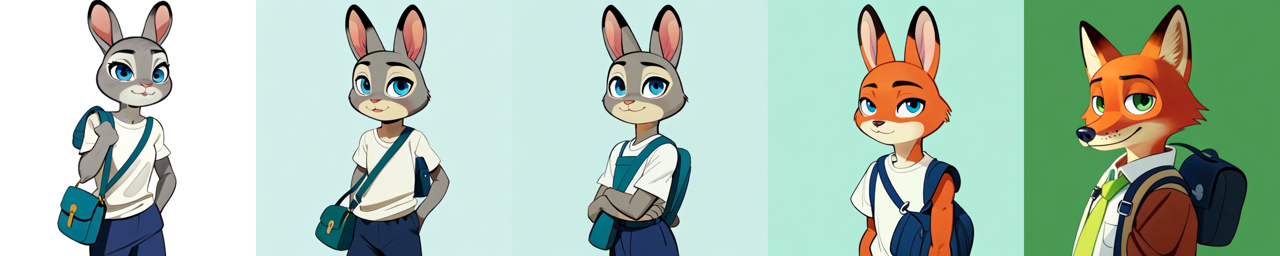

In [18]:
prompt_a = "uploaded on e621, ((by Cleon Peterson, by Sonia Delaunay, by Tomer Hanuka, by Dagasi, traditional media (artwork))), solo female ((toony judy hopps, grey body, blue eyes, white short t-shirt, dark blue short pants)), shoulder bag, ((three-quarter portrait))"
prompt_b = "uploaded on e621, ((by Cleon Peterson, by Sonia Delaunay, by Tomer Hanuka, by Dagasi, traditional media (artwork))), solo male ((toony Nick Wilde, red body, green eyes)), shoulder bag, ((three-quarter portrait, three-quarter view,))"
negative_prompt = "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]" # "deformed, ugly, wrong proportion, low res, bad anatomy, worst quality, low quality"
interpolation_size = 5
num_inference_steps = 50

images = beta_pipe.generate_interpolation(
    prompt_a,
    prompt_b,
    negative_prompt,
    latent_start,
    latent_end,
    num_inference_steps,
    exploration_size=int(interpolation_size * 2),
    interpolation_size=interpolation_size,
    warmup_ratio=0.5
)

show_image = image_grids(images, 1, interpolation_size).resize((interpolation_size * 256, 256))
show_image